In [1]:
# Import function modulus
import dj_func


[2024-03-06 13:35:31,488][INFO]: Connecting judewerth@db.datajoint.com:3306
[2024-03-06 13:35:32,326][INFO]: Connected judewerth@db.datajoint.com:3306


In [2]:
# Define Initital Parameters

session_info = dict(
    organoid_id = "O09",
    experiment_start_time="2023-05-18 12:25:00",
    insertion_number=0,
    start_time = "2023-05-18 12:45:00",
    end_time = "2023-05-18 12:50:00",
    session_type="spike_sorting",
    unused_organoids = [] # [] = all orgaonoids used
                        # else list from 0-3 for the organoids to remove (0 = 9or13or17 , 1 = 10or14or18 , etc)
    )                   # value depends on organoid_id to determine the batch (9-12 , 13-16, 17-20)

session_probe_info = dict(
    organoid_id = "O09",
    experiment_start_time= "2023-05-18 12:25:00",
    insertion_number=0,
    start_time = "2023-05-18 12:45:00",
    end_time = "2023-05-18 12:50:00",
    probe="Q983",  # probe serial number
    port_id="A",  # Port ID ("A", "B", etc.)
    unused_electrodes=[]  # keep as [] to automatically used # of electrodes based on organoid 
                        # or else put a int as the number of electrodes to be included (starting at the tip of the recording deivce)
                        # to use all electrodes: input 32 --> for all organoids
                        # to pick specific channels make a list, ex: [1 4 7] --> for all organoids
    )

In [3]:
# Get Session Info: x
# Input: Session Info , Session Probe Info
# Output: key (query with needed parameters) and unused_electrodes
x = dj_func.spike(session_info = session_info , session_probe_info = session_probe_info)
x


In [6]:
# Get File names
# Input: x
# Output: array of file names
files = x.get_files()
files

In [8]:
# Get recording data
# Input: File names
# Output: Recording Data (1 segment)
recording = x.get_recording(files = files)
recording

ConcatenateSegmentRecording: 128 channels - 20.0kHz - 1 segments - 6,000,000 samples 
                             300.00s (5.00 minutes) - uint16 dtype - 1.43 GiB

In [23]:
# Filter Recording data
# Input: raw_recording
# Output: processed_recording (removes unused electrodes from each organoid and filters traces)
processed_recording = x.filter_recording(raw_recording = recording)
processed_recording.get_channel_groups()


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [10]:
# Get Sorting Data
# Input: recording, sorter_name, savefolder 
# Output: sorting

sorting = x.get_sorting(processed_recording , "spykingcircus2" , "230518_1245_1250") # -> savefolder=[] if you don't want to save
sorting

UnitsAggregationSorting: 61 units - 1 segments - 20.0kHz

In [11]:
# Get Waveform Data
# Input: recording, sorting, savefolder
# Output: waveforms

waveforms = x.get_waveforms(processed_recording , sorting , "230518_1245_1250")
waveforms

ValueError: This WaveformExtractor folder was created with an older version of spikeinterface
You cannot use the mode with_recording=False

In [ ]:
from spikeinterface import WaveformExtractor
folder = '/Users/judewerth/Library/Caches/utah_organoids/outbox/waveforms/test'

y = WaveformExtractor(recording=processed_recording , sorting=sorting , folder=folder)
we = y.run_extract_waveforms()



In [14]:
# Get and save waveform data
savefolder = "230518_1245_1250"
from workflow.utils.paths import (
    get_ephys_root_data_dir,
    get_raw_root_data_dir,
    get_processed_root_data_dir,
)
import spikeinterface as si
datapath = get_processed_root_data_dir() / "waveforms"


savepath = datapath / savefolder
savepath.mkdir(exist_ok=True , parents=True)
we = si.extract_waveforms(
    processed_recording,
    sorting,
    folder=savepath,
    ms_before=1.5,
    ms_after=2.,
    max_spikes_per_unit=500,
    overwrite=True,   
    )


extract waveforms shared_memory multi buffer:   0%|          | 0/300 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/300 [00:00<?, ?it/s]

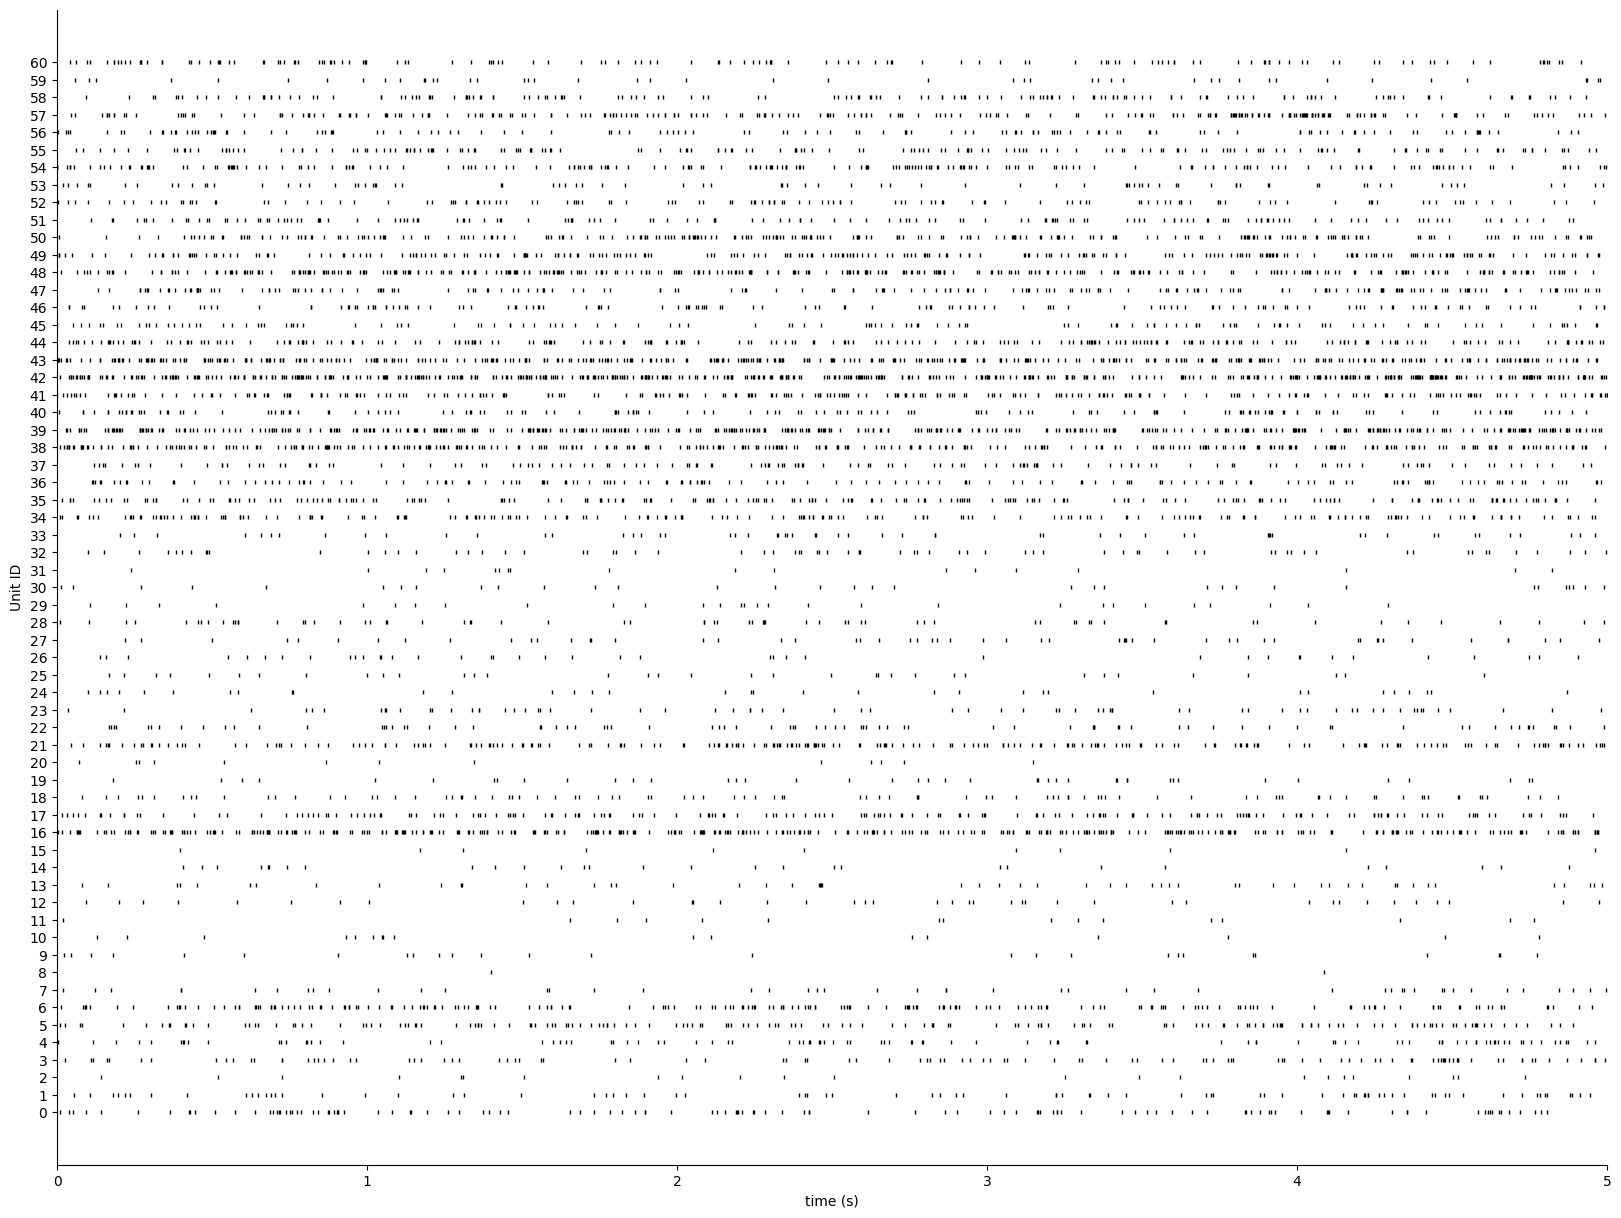

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
# Plot rasters
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
si.widgets.plot_rasters(sorting, time_range=[0, 5], ax=ax)
ax.set_ylabel("Unit ID")

# si.widgets.plot_rasters(sorting, time_range=[0, 5], unit_ids=[unit_id], ax=ax)
sns.despine()

In [18]:
import spikeinterface.postprocessing as pp
import spikeinterface as si
PCA = pp.compute_principal_components(waveform_extractor=we , n_components=5 , mode='by_channel_global' , )



Fitting PCA:   0%|          | 0/61 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/61 [00:00<?, ?it/s]

(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(180, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(499, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)
(500, 5, 78)


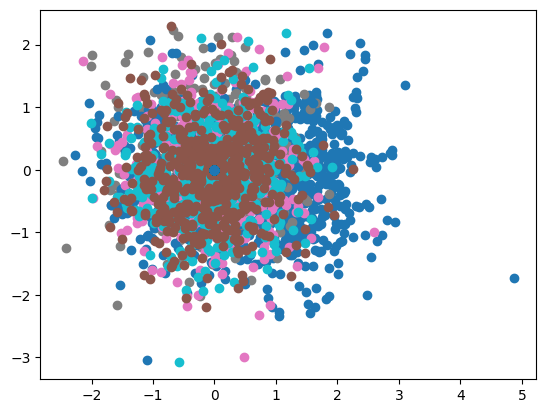

In [22]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
for i, unit_id in enumerate(sorting.unit_ids):
    comp = PCA.get_projections(unit_id)
    print(comp.shape)

    ax.scatter(comp[:, 0, 8], comp[:, 1, 8])



array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

  